# Predicting Boston Housing Prices



The dataset for this project originates from the . The Boston housing data ([UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing) was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts.
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.


In [13]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

import visuals as vs

%matplotlib inline

data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration



### Implementation: Calculate Statistics
Calculating descriptive statistics about the Boston housing prices.

In [14]:
minimum_price = np.min(prices)

maximum_price = np.max(prices)

mean_price = np.mean(prices)

median_price = np.median(prices)

std_price = np.std(prices)

print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429477


### Feature Observation
 we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.



1. Greater 'RM' value will lead to an increase of 'MEDV'. More rooms in the neighborhood, which could imply higher cost of constructing the houses, and therefore, higher prices in the neignborhood.
2. Higher 'LSTAT' willl lead to lower 'MEDV'. If the percentage of 'lower class' homeowners is high, could possibly drag down the average house prices of the neignborhood.
3. Higher 'PTRATIO' will lead to lower 'MEDV'. Higher 'PTRATIO', which means more students than teachers in primary and secondary schools, and the education quaility could be affected negatively, and thus, lead to lower house prices in the neighborhood. 

----

## Developing a Model


### Implementation: Define a Performance Metric


In [15]:
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    score = r2_score(y_true, y_predict)
    return score


The R2 score meaures the variance of the fitted regression, and calculates the squared residuals respect to the average value. The lower the distance between the actual point and predicted point of the regression plot, the greater the R2 score.

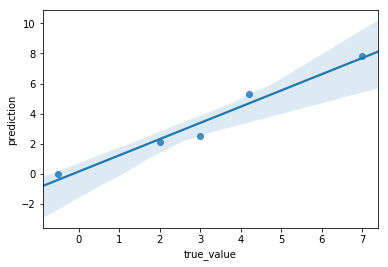

In [16]:
# A R square example
import seaborn as sns
test_data = pd.DataFrame(data={'true_value': [3, -0.5, 2, 7, 4.2], 'prediction': [2.5, 0.0, 2.1, 7.8, 5.3]})
sns.regplot(test_data['true_value'], test_data['prediction'])

### Implementation: Shuffle and Split Data
Next we will shuffle Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, prices,test_size = 0.2 , random_state = 42)

# print("Training and testing split was successful.")


If we split the data randomly into certain ratio, so that we can use the split data to measure the training error and testing errors. <br>
Without splitting the data, which means we use all data for training could end up having an overfitting model. In addition, we can not use testing data to validate the model, otherwise, the model is biased. Therefore, creating a cross validation data while splitting the dataset is also necessary. <br>
Based on the training and testing error, we can use it to create the model complexity graph, if both training and testing error are big, the model underfits. But if the training error is big and testing error is low, then the model overfits.


----

## Analyzing Model Performance


### Learning Curves


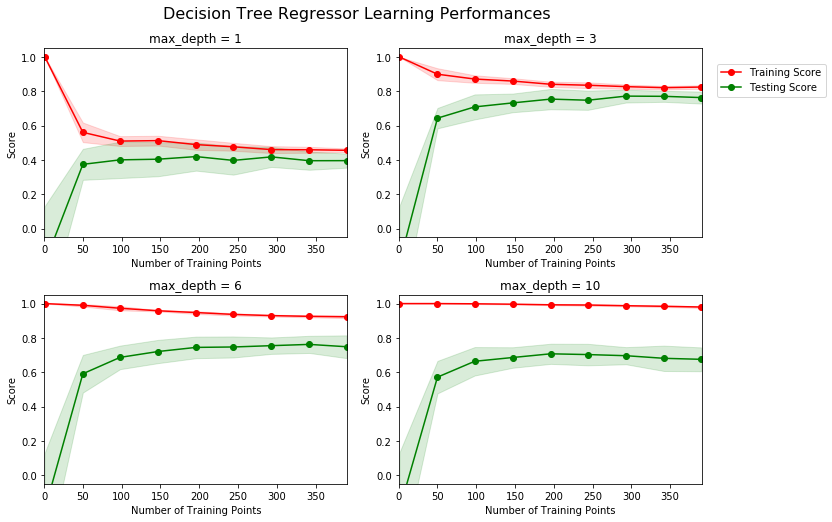

In [18]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)


Take the max_depth = 10 graph as an example. 
If the number of training points increase, the testing score increases. However, the model still has a revelatively low testing score. More training points do not seem to benefit the model, as the testing score did not increase after training points reached 200.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

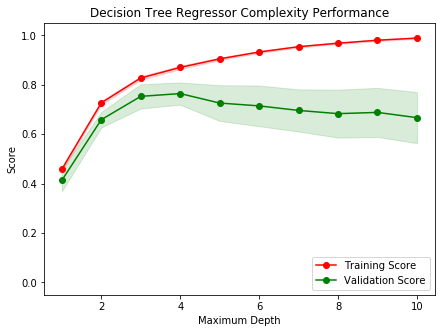

In [19]:
vs.ModelComplexity(X_train, y_train)

### Bias-Variance Tradeoff


1. When the model is trained with maximum depth of 1, the model is suffered from high bias, as it has low training and validation scores.
2. When the maximum depth is 10, it will have a high training score but a low validation score, which means its variance is high


So far the maximum depth of 4 would be the best choice. Because the model will have the highest validation score, and the training score is also high.


-----

## Evaluating Model Performance


### Grid Search



Grid search technique a way of using grid to present test scores with different combination of parmeters. <br>
Hyper-parameters, values of hyper-parameters, and performance matric were passed to the grid search algorithm. Based on the input, the grid search will find the performance matric values for all the hyper-parameter combinations. Based on the performance matric value, it will output the parameter that generate the best result. <br>
Take decision tree method as an example. 
When using a decision tree model in prediction, we create the models simply by changing max depth, or changing minimum sample split. While instead of view each combination of parameter one by one, we can present a n * n grid with number of desired parameter combinations' test scores(e.g. F1 score, R score), and from the grid search technique


###  Cross-Validation




K fold cross validation is the method to break the data into k buckets, using one of the bucket as the testing and the rest buckets as training data. The data will be trained k times, and used the averaged results to get the final model.([docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation))<br>

Using this method: <br>
1. we can generate randomized training and testing datasets for testing purchase, while using grid serach only used one particular pair of training and testing datasets.
2. Reduce the variance of a single trial of a train/test split.

### Implementation: Fitting a Model
Training a model using the **decision tree algorithm**.  Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. 
ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer



def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    regressor = DecisionTreeRegressor(random_state=0)

    params = {'max_depth': [i for i in range(1,11)]}

    scoring_fnc =  make_scorer(performance_metric)

    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv= cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions


### Optimal Model


In [21]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.



Parameter 'max_depth' is 4 for the optimal model.<br>


###  Predicting Selling Prices
Predicting sample client home prices
| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |


In [22]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36



Predicted selling price for Client 1's home: `$`403,025.00<br>
Predicted selling price for Client 2's home: `$`237,478.72<br>
Predicted selling price for Client 3's home: `$`931,636.36

Statistics for Boston housing dataset:

Minimum price: `$`105,000.0 <br>
Maximum price: `$`1,024,800.0 <br> 
Mean price: `$`454,342.94 <br>
Median price `$`438,900.0 <br>
Standard deviation of prices: `$`165171.13 <br>


The prices predicted for three clients reflected 3 difference price levels.  <br>
Client 1 home price is quite close to the median price of the total Boston Home Price dataset.
Client 2 home price is more close the lower level of home prices
Client 3 home price worth much more than the previous two homes, and it is priced towards the higher level of home prices.

Client 1's home price is reaonable as it has morderate poverty level, and the student to teacher ratio is not high as well.
Client 2 has the lowest price among these three clients, mainly due to its high poverty level and high student to teacher ratio.
Clinet 3 worth the highest, which is also reasonable, as it has the greatest number of rooms, and very low poverty level and student to teacher ratio.



### Sensitivity

In [23]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Applicability



First of all, if we are predicting the prices in 1978, the prediction result would be much more reliable than the result if we run today. The inflation rate has changed tremendously for the past 40 years, and $403,025 might worth 285 times higher than today, therefore, the predicted value should be align with the time we run the prediction model.<br>
Currently, we only have three variables that being used for creating the prediction model, in reality, we might need to consider a lot more factors than only 3 factors. Factors that can be added to the model could be number of schools in the neighborhood, square foot of plant area, annual income for applicants etc. <br>
For now, I do not believe the model is robust enough to make consistent predictions. From the 10 trials, we can see there is a difference of 28,652.84 between highest and lowest predicted prices, which is about half of the predicted price. In order to make consistent predictions, we might need to consider other prediction models, and compare the prediction result with this model and choose the best of all models used.<br>
In addition, I would not suggest to use data collected from urban city to be used for rural cities. The demographic, economics, and culture could be significant different between urban and rural cities.<br>
Last but not the least, the characteristics of the neighborhood could be a helpful factor in valuing the home prices, and communities like Beverly Hills may have different characteristics than other neighborhoods in California.
  
 


